# KNN Multiclass Classifier

In this activity, we will use the KNN model to classify the MNIST dataset into 10 different digit-based classes.

In [1]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.neighbors import KNeighborsClassifier as KNN

Load the MNIST data into memory; first the training images, then the training labels, then the test images, and, finally, the test labels.

In [2]:
with gzip.open('../Datasets/train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

with gzip.open('../Datasets/t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

Visualize a sample of the data.

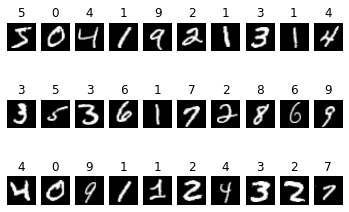

In [4]:
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(img[i], cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')

plt.show()

Construct a KNN classifier, with three nearest neighbors to classify the MNIST dataset. Again, to save processing power, randomly sample 5,000 images for use in training.

In order to provide the image information to the model, we must first flatten the data out such that each image is 1 x 784 pixels in shape.

Build the KNN model with k=3 and fit the data to the model. Note that, in this activity, we are providing 784 features or dimensions to the model, not just 2.

In [6]:
sel = np.random.choice(len(img), 5000)
img_sel = img[sel]
labels_sel = labels[sel]

In [11]:
model = KNN(3)
model.fit(
    X=img_sel.reshape(-1, rows * cols), 
    y=labels_sel,
)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Determine the score against the training set.

In [12]:
model.score(
    X=img_sel.reshape(-1, rows * cols), 
    y=labels_sel,
)

0.9702

Display the first ~~two~~ five predictions for the model against the training data.

In [16]:
pred_sample = model.predict(
    img_sel.reshape(-1, rows * cols)[:5]
)
pred_sample

array([8, 8, 8, 7, 5], dtype=uint8)

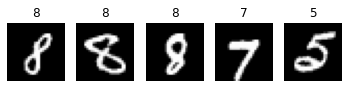

In [17]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(img_sel[i], cmap='gray')
    plt.title(f'{pred_sample[i]}')
    plt.axis('off')

plt.show()    

Compare the performance against the test set.The output will be as follows:

In [19]:
model.score(
    X=img_test.reshape(-1, rows * cols),
    y=labels_test
)

0.9364

If we compare the preceding test set performance with that in Exercise 5.03, Logistic Regression – Multiclass Classifier, we see that for the exact same dataset, the knn model outperforms the logistic regression classifier regarding this task. This doesn't necessarily mean that knn always outperforms logistic regression, but it does so for this task, for this dataset.